# Изотоническая регрессия  
Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from scipy.optimize import minimize

Загружаем данные.

In [2]:
data = pd.read_excel('HybridCarsComparison.xls')
data

,Features,Fuel Type,Transmission,MPG in City,MPG on Highway,Overall MPG,Cost for 25 Miles,Fuel to Drive 25 Miles,Cost To Fill Tank,Miles per Tank,Tank Volume,Carbon Dioxide Emission per Annum,EPA Size Class,Engine Size in Liters,Cylinders,Passenger Volume,Luggage Volume
0,Toyota Prius,Regular Gasoline,Auto (CVT),60.0,51.0,55.0,$1.46,0.45 gal,$34.49,589 miles,11.9 gal,3.4 tons,Midsize Car,1.5,4.0,96 ft3 (HB),16 ft3 (HB)
1,Toyota Camry Hybrid,Regular Gasoline,Auto (CVT),40.0,38.0,39.0,$2.06,0.64 gal,$49.85,604 miles,17.2 gal,4.8 tons,Midsize Car,2.4,4.0,101ft3 (4D),11ft3 (4D)
2,Saturn Aura Hybrid,Regular Gasoline,Auto (CVT),28.0,35.0,30.0,$2.68,0.83 gal,$47.53,443 miles,16.4 gal,6.0 tons,Midsize Car,2.4,4.0,NaN,NaN
3,Nissan Altima,Regular Gasoline,Auto (CVT),42.0,36.0,39.0,$2.06,0.64 gal,$57.96,702 miles,20.0 gal,4.7 tons,Midsize Car,2.5,4.0,101ft3 (4D),10 ft3 (4D)
4,Hybrid Lexus GS 450h,Premium Gasoline,Auto (S6),25.0,28.0,26.0,$3.27,0.96 gal,$52.63,402 miles,17.2 gal,8.0 tons,Compact Car,3.5,6.0,98 ft3 (4D),8 ft3 (4D)
5,Honda Civic Hybrid,Regular Gasoline,Auto (CVT),49.0,51.0,50.0,$1.61,0.50 gal,$35.65,554 miles,12.3 gal,4.4 tons,Compact Car,1.3,4.0,91ft3 (4D),10ft3 (4D)
6,Honda Accord Hybrid,Regular Gasoline,Auto (5 speed),28.0,35.0,31.0,$2.60,0.81 gal,$49.56,477 miles,17.1 gal,6.8 tons,Midsize Car,3.0,6.0,103ft3 (4D),11ft3 (4D)
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,the source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,http://www.buzzle.com/articles/hybrid-cars-com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вижу мусор - выкидываю.

In [3]:
data.drop([7, 8, 9], axis=0, inplace=True)
data

,Features,Fuel Type,Transmission,MPG in City,MPG on Highway,Overall MPG,Cost for 25 Miles,Fuel to Drive 25 Miles,Cost To Fill Tank,Miles per Tank,Tank Volume,Carbon Dioxide Emission per Annum,EPA Size Class,Engine Size in Liters,Cylinders,Passenger Volume,Luggage Volume
0,Toyota Prius,Regular Gasoline,Auto (CVT),60.0,51.0,55.0,$1.46,0.45 gal,$34.49,589 miles,11.9 gal,3.4 tons,Midsize Car,1.5,4.0,96 ft3 (HB),16 ft3 (HB)
1,Toyota Camry Hybrid,Regular Gasoline,Auto (CVT),40.0,38.0,39.0,$2.06,0.64 gal,$49.85,604 miles,17.2 gal,4.8 tons,Midsize Car,2.4,4.0,101ft3 (4D),11ft3 (4D)
2,Saturn Aura Hybrid,Regular Gasoline,Auto (CVT),28.0,35.0,30.0,$2.68,0.83 gal,$47.53,443 miles,16.4 gal,6.0 tons,Midsize Car,2.4,4.0,NaN,NaN
3,Nissan Altima,Regular Gasoline,Auto (CVT),42.0,36.0,39.0,$2.06,0.64 gal,$57.96,702 miles,20.0 gal,4.7 tons,Midsize Car,2.5,4.0,101ft3 (4D),10 ft3 (4D)
4,Hybrid Lexus GS 450h,Premium Gasoline,Auto (S6),25.0,28.0,26.0,$3.27,0.96 gal,$52.63,402 miles,17.2 gal,8.0 tons,Compact Car,3.5,6.0,98 ft3 (4D),8 ft3 (4D)
5,Honda Civic Hybrid,Regular Gasoline,Auto (CVT),49.0,51.0,50.0,$1.61,0.50 gal,$35.65,554 miles,12.3 gal,4.4 tons,Compact Car,1.3,4.0,91ft3 (4D),10ft3 (4D)
6,Honda Accord Hybrid,Regular Gasoline,Auto (5 speed),28.0,35.0,31.0,$2.60,0.81 gal,$49.56,477 miles,17.1 gal,6.8 tons,Midsize Car,3.0,6.0,103ft3 (4D),11ft3 (4D)


Собственно, для некоторой простоты давайте выкинем нечисловые признаки.

In [4]:
data.drop(['Features', 'Fuel Type', 'Transmission', 'Carbon Dioxide Emission per Annum',
           'EPA Size Class', 'Luggage Volume', 'Passenger Volume'], axis=1, inplace=True)
data

,MPG in City,MPG on Highway,Overall MPG,Cost for 25 Miles,Fuel to Drive 25 Miles,Cost To Fill Tank,Miles per Tank,Tank Volume,Engine Size in Liters,Cylinders
0,60.0,51.0,55.0,$1.46,0.45 gal,$34.49,589 miles,11.9 gal,1.5,4.0
1,40.0,38.0,39.0,$2.06,0.64 gal,$49.85,604 miles,17.2 gal,2.4,4.0
2,28.0,35.0,30.0,$2.68,0.83 gal,$47.53,443 miles,16.4 gal,2.4,4.0
3,42.0,36.0,39.0,$2.06,0.64 gal,$57.96,702 miles,20.0 gal,2.5,4.0
4,25.0,28.0,26.0,$3.27,0.96 gal,$52.63,402 miles,17.2 gal,3.5,6.0
5,49.0,51.0,50.0,$1.61,0.50 gal,$35.65,554 miles,12.3 gal,1.3,4.0
6,28.0,35.0,31.0,$2.60,0.81 gal,$49.56,477 miles,17.1 gal,3.0,6.0


In [5]:
def float_from_str(s):
    if type(s) == str:
        return float(''.join(c for c in s if c.isdigit() or c == '.'))
    return s

for column in data.columns:
    data[column] = [float_from_str(s) for s in data[column]]
data

,MPG in City,MPG on Highway,Overall MPG,Cost for 25 Miles,Fuel to Drive 25 Miles,Cost To Fill Tank,Miles per Tank,Tank Volume,Engine Size in Liters,Cylinders
0,60.0,51.0,55.0,1.46,0.45,34.49,589.0,11.9,1.5,4.0
1,40.0,38.0,39.0,2.06,0.64,49.85,604.0,17.2,2.4,4.0
2,28.0,35.0,30.0,2.68,0.83,47.53,443.0,16.4,2.4,4.0
3,42.0,36.0,39.0,2.06,0.64,57.96,702.0,20.0,2.5,4.0
4,25.0,28.0,26.0,3.27,0.96,52.63,402.0,17.2,3.5,6.0
5,49.0,51.0,50.0,1.61,0.50,35.65,554.0,12.3,1.3,4.0
6,28.0,35.0,31.0,2.60,0.81,49.56,477.0,17.1,3.0,6.0


Столбцы Cost to Fill Tank и Tank Volume, очевидно, линейно зависимы, поэтому выкинем один из них, например, Cost to Fill Tank. Так же Cost for 25 miles можно легко вычислить, зная Cost to Fill Tank (который есть линейная функция от Tank Volume) и Miles per Tank, поэтому исключим этот признак как избыточный. Fuel for 25 Miles и Miles per Tank можно узнать, зная Tank Volume и Overall MPG. Тем не менее, Overall MPG мы будем считать ф-цией от MPG in City и MPG on Highway, поэтому этот признак тоже выкинем.

In [6]:
data.drop(['Cost for 25 Miles', 'Cost To Fill Tank', 'Fuel to Drive 25 Miles', 'Miles per Tank', 'Overall MPG'], axis=1, inplace=True)
data

,MPG in City,MPG on Highway,Tank Volume,Engine Size in Liters,Cylinders
0,60.0,51.0,11.9,1.5,4.0
1,40.0,38.0,17.2,2.4,4.0
2,28.0,35.0,16.4,2.4,4.0
3,42.0,36.0,20.0,2.5,4.0
4,25.0,28.0,17.2,3.5,6.0
5,49.0,51.0,12.3,1.3,4.0
6,28.0,35.0,17.1,3.0,6.0


Разместим столбцы в порядке убывания важности признаков (по моему бессомненно экспертному мнению). Убывание важности признаков означает, что модули весов при них не возрастают.

In [7]:
data = data.reindex(columns=['MPG in City', 'Tank Volume', 'MPG on Highway', 'Engine Size in Liters', 'Cylinders'])
data

,MPG in City,Tank Volume,MPG on Highway,Engine Size in Liters,Cylinders
0,60.0,11.9,51.0,1.5,4.0
1,40.0,17.2,38.0,2.4,4.0
2,28.0,16.4,35.0,2.4,4.0
3,42.0,20.0,36.0,2.5,4.0
4,25.0,17.2,28.0,3.5,6.0
5,49.0,12.3,51.0,1.3,4.0
6,28.0,17.1,35.0,3.0,6.0


Дадим не менее экспертную оценку и самим автомобилям (по шкале от 1 до 10)

In [8]:
y = np.array([3, 7, 9, 8, 9.5, 5, 9])

Представим таблицу как матрицу. Поразмыслив, мы решили все-таки не добавлять столбец единиц. Да, это не очень типично для линейной регрессии, но есть подозрение, что при изотонической регрессии он будет только мешать, ведь эксперт не может наложить никаких ограничений на вес при фиктивном признаке, соответственно, наш алгоритм будет подгоняться под экспертные оценки, игнорируя свободный член, что, скорее всего, приведет только к ухудшению ситуации.

In [9]:
X = data.to_numpy()
X

array([[60. , 11.9, 51. ,  1.5,  4. ],
       [40. , 17.2, 38. ,  2.4,  4. ],
       [28. , 16.4, 35. ,  2.4,  4. ],
       [42. , 20. , 36. ,  2.5,  4. ],
       [25. , 17.2, 28. ,  3.5,  6. ],
       [49. , 12.3, 51. ,  1.3,  4. ],
       [28. , 17.1, 35. ,  3. ,  6. ]])

Посчитаем веса, соответствующие нашим экспертным оценкам.

In [10]:
expert_weights = np.dot(np.linalg.pinv(X), y)
print(expert_weights)

[-0.18452797  0.34524197  0.18014888  1.410584   -0.33753948]


Как видим, экспертные веса совсем не соответствуют тем ограничениям, которые мы, как эксперты, наложили на них. Больше всего внимания мы уделяем Engine Size in Liters, хотя на деле это один из самых незначительных признаков. Что ж, не вышло из нас экспертов!  
Тем не менее, не будем пытаться что-то менять, а попробуем поработать с тем, что есть. Очевидно, при столь большой ошибке трудно учесть сразу и экспертные оценки, и экспертные веса.

In [11]:
def error_func(w, *args): #args[0] = lambda
    return np.sum((expert_weights - w)**2) + args[0]*np.sum(np.clip(np.abs(w[1:]) - np.abs(w[:-1]), 0, np.inf))

Для начала попробуем взять $\lambda = 0$

In [12]:
res = minimize(error_func, x0 =  np.random.rand(len(expert_weights)), args=0.0, method='BFGS')
print(res.x)

[-0.18452798  0.34524195  0.18014884  1.410584   -0.33753948]


Видим, что полученные веса практически в точности равны экспертным. Несущественная разница вызвана, скорее всего, некоторой погрешностью функции minimize, которая все-таки не может гарантировать в общем случае точного решения.  
Возьмем теперь $\lambda = 100$

In [13]:
res = minimize(error_func, x0 = np.random.rand(len(expert_weights)), args=100.0, method='BFGS')
print(res.x)

[ 0.05088016  0.0284598  -0.02632545  0.02697104  0.03055558]


Видим, что действительно модули наших весов теперь не возрастают.  
Построим теперь несколько графиков, соответствующих разным значениям $\lambda$

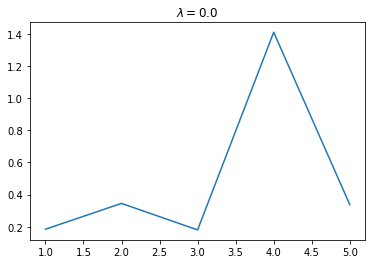

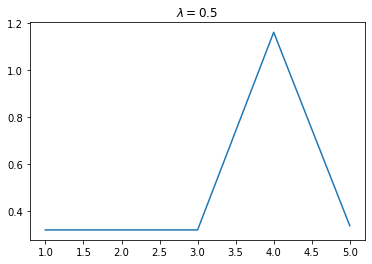

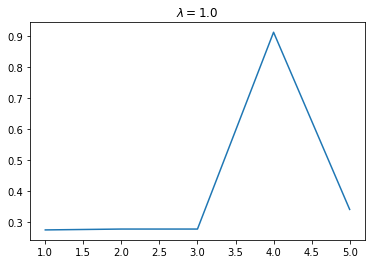

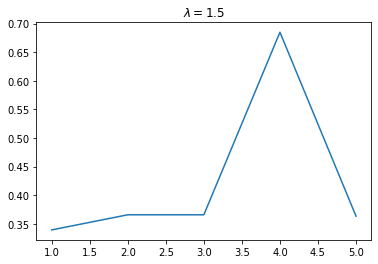

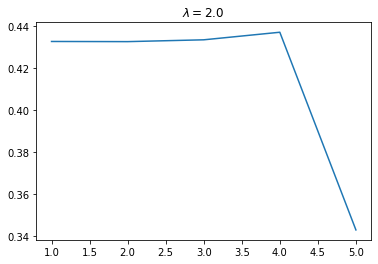

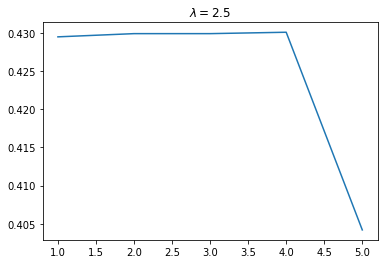

In [14]:
for lmb in np.arange(0, 3, 0.5):
    plt.plot(np.arange(len(expert_weights)) + 1, np.abs(minimize(error_func, x0 = np.random.rand(len(expert_weights)), 
                                                      args=lmb, method='BFGS').x))
    plt.title('$\\lambda = $' + str(lmb))
    plt.show()

Между 1,5 и 2 наблюдаем существенные изменения. Выведем поподробнее.

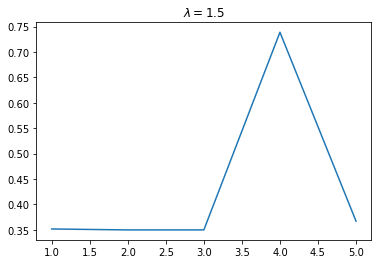

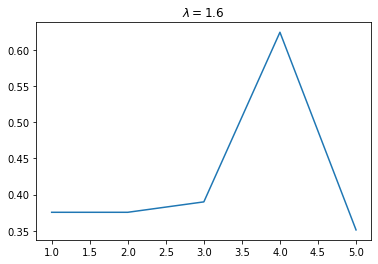

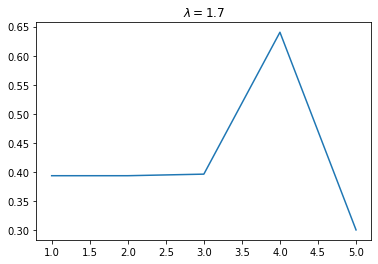

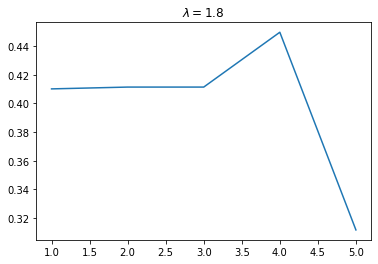

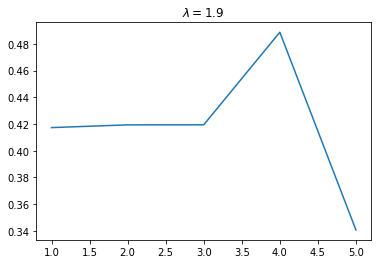

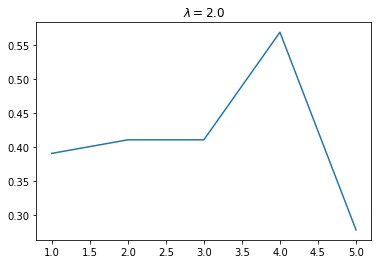

In [15]:
for lmb in np.arange(1.5, 2.05, 0.1):
    plt.plot(np.arange(len(expert_weights)) + 1, np.abs(minimize(error_func, x0 = np.random.rand(len(expert_weights)), 
                                                      args=lmb, method='BFGS').x))
    plt.title('$\\lambda = $' + str(round(lmb, 1)))
    plt.show()